In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
labels = pd.read_csv("/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train_labels.csv")   # loading the labels
labels.head()           # will display the first five rows in labels dataframe

,filename,label
0,0.jpg,without_mask
1,1.jpg,without_mask
2,10.jpg,without_mask
3,100.jpg,without_mask
4,101.jpg,without_mask


In [4]:
file_paths = [[fname, '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/' + fname] for fname in labels['filename']]
# file_paths

[['0.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/0.jpg'],
 ['1.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/1.jpg'],
 ['10.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/10.jpg'],
 ['100.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/100.jpg'],
 ['101.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/101.jpg'],
 ['102.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/102.jpg'],
 ['104.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/104.jpg'],
 ['105.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/105.jpg'],
 ['106.jpg',
  '/Volumes/SEANDUAL/257-support/with-without-mask/archive/maskdata/maskdata/train/train/106.

In [5]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,0.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
1,1.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
2,10.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
3,100.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...
4,101.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...


In [6]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()  

,filename,filepaths,label
0,0.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
1,1.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
2,10.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
3,100.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask
4,101.jpg,/Volumes/SEANDUAL/257-support/with-without-mas...,without_mask


In [7]:
data = []             # initialize an empty numpy array
image_size = 100      # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i])   # Uses BGR instead of RGB, have to change it back
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) # Converts to correct image encoding
    new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array
    
    # encoding the labels. with_mask = 1 and without_mask = 0
    if train_data['label'][i] == 'with_mask':
        data.append([new_img_array, 1])
    else:
        data.append([new_img_array, 0])

In [8]:
# The shape of an image array
# data = [[img-array], [img-class: with_mask = 1 and without_mask = 0]]
data = np.array(data)
data[0][0].shape  # think of it as 2d array with every element consist of 3 element rgb

(100, 100, 3)

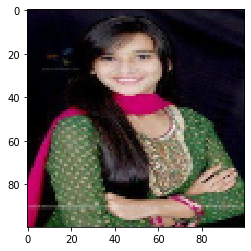

In [9]:
plt.imshow(data[0][0])